# IMDb Analysis

# Load, Inspect, & Query Movie & Ratings Data

In [2]:
""" Q1: 
Load and read the 'imdb.xlsx' file. Read the 'imdb' sheet into a DataFrame, df.
"""

import pandas as pd

# your code here
xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')

In [3]:
""" Q2: 
Store the dimensions of the DataFrame as a tuple in a variable called 'shape' and print it.

Hint: A tuple is made up of comma separated values inside parenthesis.  e.g. (1, 2)
"""

# your code here
shape = df.shape
print(shape)

(178, 8)


In [4]:
""" Q3: 
Store the column titles and the types of data in variables named 'columns' and 'dtypes', then print them.
"""

# your code here
columns = df.columns
print(columns)
dtypes = df.dtypes
print(dtypes)

Index(['movie_title', 'director_id', 'country_id', 'content_rating',
       'title_year', 'imdb_score', 'gross', 'duration'],
      dtype='object')
movie_title        object
director_id         int64
country_id          int64
content_rating     object
title_year          int64
imdb_score        float64
gross               int64
duration            int64
dtype: object


In [5]:
""" Q4: 
Extract the first 10 rows of data; store them in a variable called first10
"""

# your code here
first10 = df.head(10)

In [6]:
""" Q5: 
Extract the first 5 rows of data; store them in a variable called first5
"""

# your code here
first5 = df.head()

In [7]:
""" Q6: 
Import the "directors" and "countries" sheets into their own DataFrames, df_directors and df_countries.
"""

# your code here
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

In [8]:
""" Q7: 
Check the "directors" sheet
1. Count how many records there are based on the "id" column. 

   To get the number of records per "id", use the value_counts method.
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
   Store the result in a variable named count.
   
2. Remove the duplicates from the directors dataframe and store the result in a variable called df_directors_clean.
"""

# your code here
count = df_directors.value_counts()
df_directors_clean = df_directors.drop_duplicates()

# Join & Filter Movie & Ratings Data

In [9]:
""" Q1: 
Join three Dataframes: df, df_directors_clean, and df_countries with an inner join.
Store the joined DataFrames in df.
"""

# your code here
df = pd.merge(left = df, right = df_directors_clean, how = 'inner', left_on = 'director_id', right_on = 'id')
df = pd.merge(left = df, right = df_countries, how = 'inner', left_on = 'country_id', right_on = 'id')
# After the join, the resulting Dataframe should have 12 columns.
df.shape

(178, 12)

In [10]:
""" Q2: 
Save the first ten rows of movie titles(only movie titles column) in a variable called first10, then print it.
"""

# your code here
first10 = df["movie_title"].head(10)
print(first10)

0    The Shawshank RedemptionÊ
1              The Green MileÊ
2               The GodfatherÊ
3      The Godfather: Part IIÊ
4              Apocalypse NowÊ
5             The Dark KnightÊ
6                   InceptionÊ
7                InterstellarÊ
8                     MementoÊ
9                The PrestigeÊ
Name: movie_title, dtype: object


In [11]:
""" Q3: 
There's an extra character at the end of each movie title. 

Remove it from the data using str.replace.
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html

And print the first ten rows of movie titles again. 
"""

# your code here
#movie_title = df["movie_title"]
#df.replace(to_replace = 'Ê', value = '')
df['movie_title'] = df['movie_title'].str.replace('Ê', '')
df["movie_title"].head(10)

0    The Shawshank Redemption
1              The Green Mile
2               The Godfather
3      The Godfather: Part II
4              Apocalypse Now
5             The Dark Knight
6                   Inception
7                Interstellar
8                     Memento
9                The Prestige
Name: movie_title, dtype: object

In [12]:
""" Q4:
Who is the director with the most movies? First get the number of movies per "director_name".

   To get the number of records per "director_name", use the value_counts method.
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
   
Then extract the director with the highest count and save in a variable called "director_with_most".
"""

# your code here
director_movie_count = df.value_counts(subset = 'director_name')
for value in director_movie_count.head(1).keys():
    director_with_most = value

In [13]:
"""Q5:
Save all of this director's movies and their imdb_score in a variable called all_movies_ratings, then print this variable.
(The director with the most movies you got from the last question.)
"""

# your code here
all_movies_ratings = df[df['director_name'] == director_with_most][['movie_title', 'imdb_score']]
print(all_movies_ratings)

              movie_title  imdb_score
5         The Dark Knight         9.0
6               Inception         8.8
7            Interstellar         8.6
8                 Memento         8.5
9            The Prestige         8.5
10  The Dark Knight Rises         8.5
11          Batman Begins         8.3


# Summarize Movie & Ratings Data

In [14]:
""" Q1: 
Get the summary statistics for imdb_score and gross, then use the describe() function to summarize this visually. Save the
result in a variable called score_gross_description and print it.
"""

# your code here
import numpy as np
pivot_table = pd.pivot_table(df, 
                             index=["movie_title"], 
                             values=["imdb_score", "gross"], 
                             aggfunc=[np.sum])
score_gross_description = pivot_table.describe()
print(score_gross_description)

                sum            
              gross  imdb_score
count  1.780000e+02  178.000000
mean   1.030402e+08    8.294382
std    1.242549e+08    0.266960
min    8.060000e+03    8.000000
25%    1.318510e+07    8.100000
50%    5.194371e+07    8.200000
75%    1.522436e+08    8.475000
max    6.232795e+08    9.300000


In [15]:
"""Q2:
What is the average rating of the director Christopher Nolan's movies? Save this value in a variable called nolan_mean and 
print.
"""

# your code here
nolan_mean = all_movies_ratings["imdb_score"].mean()
print(nolan_mean)

8.6


In [16]:
"""Q3:
Select the non-USA movies made after 1960 by Hayao Miyazaki.
Save the result in a DataFrame called 'miyazaki', then print it.

Here are the steps:
1. Query the data ('df' DataFrame) based on the following conditions:
- Non-USA movies (country_id != 1)
- Movies made after 1960 (title_year > 1960)
- Movies made by director Hayao Miyazaki (director_id == 46)
2. Save the filtered data in a DataFrame called 'miyazaki' and print it
"""

# your code here
Non_USA = df['country_id'] != 1
After_1960 = df['title_year'] > 1960
Hayao = df['director_id'] == 46
miyazaki = df[Non_USA & After_1960 & Hayao]
print(miyazaki)

              movie_title  director_id  country_id content_rating  title_year  \
128         Spirited Away           46           4             PG        2001   
129     Princess Mononoke           46           4          PG-13        1997   
130  Howl's Moving Castle           46           4             PG        2004   

     imdb_score     gross  duration  id_x   director_name  id_y country  
128         8.6  10049886       125    46  Hayao Miyazaki     4   Japan  
129         8.4   2298191       134    46  Hayao Miyazaki     4   Japan  
130         8.2   4710455       119    46  Hayao Miyazaki     4   Japan  


In [17]:
"""Q4: 
Create a Pivot Table that shows the median rating for each director, grouped by their respective countries. Name your variable
'pivot_agg'
"""

# your code here
pivot_agg = pd.pivot_table(df, 
                             index=["country", "director_name"], 
                             values=["imdb_score"], 
                             aggfunc=[np.mean])


In [18]:
"""Q5:
How long did the movie Gladiator aim to keep your attention? Save the series with this information
in a variable called 'gladiator_duration', then print it.
"""

# your code here
gladiator = df[df['movie_title'] == 'Gladiator']
gladiator_duration = gladiator['duration']
print(gladiator_duration)

49    171
Name: duration, dtype: int64


# Visualize Movie & Ratings Data

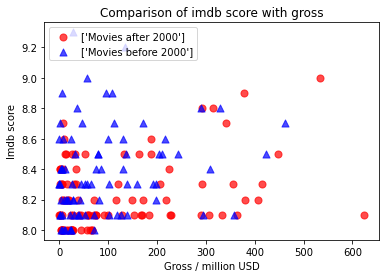

In [19]:
"""Q1: 
Is how much a movie makes indicative of how good it is?
Make a simple scatter plot comparing gross to imdb_score for movies during or after 2000 (title_year >= 2000) 
and before 2000 (title_year < 2000).
It may be useful to scale the x axis demarking gross. (Hint: Divide the gross amount by 1,000,000.)
Remember to put a legend indicating which color corresponds to which years.
What is your verdict?

Save your plot in a variable called plt1, and your dataframes in variables called df_after_2000 and df_before_2000
"""

import matplotlib.pyplot as plt1


# your code here
df['gross'] = df['gross'] / 1000000.
after = df['title_year'] >= 2000
df_after_2000 = df[after]
before = df['title_year'] < 2000
df_before_2000 = df[before]
plt1.scatter(df_after_2000['gross'], df_after_2000['imdb_score'],
            marker = 'o',
            color = 'r',
            alpha = 0.7,
            s = 50,
            label = ['Movies after 2000']
)

plt1.scatter(df_before_2000['gross'], df_before_2000['imdb_score'],
            marker = '^',
            color = 'b',
            alpha = 0.7,
            s = 50,
            label = ['Movies before 2000']
)
plt1.xlabel('Gross / million USD')
plt1.ylabel('Imdb score')
plt1.legend(loc = 'upper left')
plt1.title('Comparison of imdb score with gross')
axes = plt1.gca()
plt1.show()

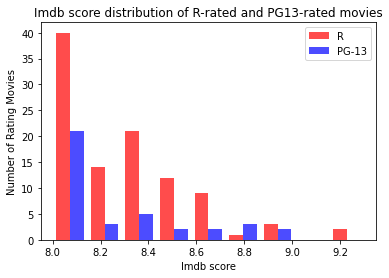

In [200]:
"""Q2: 
Using numpy and pyplot, make a side-by-side histogram that shows the score distribution(x-axis) vs. count(y-axis) of R-Rated movies and PG-13 ones.
Describe your plot.

Save your plot in a variable called plt2, and your dataframes in variables called df_R and df_PG13
"""

import matplotlib.pyplot as plt2


# your code here
R_movie = df['content_rating'] == 'R'
df_R = df[R_movie]
PG13 = df['content_rating'] == 'PG-13'
df_PG13 = df[PG13]
series_R = df_R['imdb_score']
series_PG13 = df_PG13['imdb_score']
plt2.hist(
    [series_R, series_PG13],
    alpha=0.7,
    color=["red", "blue"],
    label=["R", "PG-13"],
    bins="auto"
)

plt2.xlabel("Imdb score")
plt2.ylabel("Number of Rating Movies")
plt2.legend(loc='best')
plt2.title("Imdb score distribution of R-rated and PG13-rated movies")

plt2.show()